(nm_num_differentiation)=
# Numerical differentiation
[<!-- module-nm badge --><span class="module module-nm">Numerical Methods</span>](module-nm) 
```{index} Numerical differentiation
```
## Definition

The classical definition of the derivative of a function \\(f\\) at a point \\(x_0\\) is of given by:

 \\[f'(x_0)=\lim_{h\rightarrow 0} \frac{f(x_0+h)-f(x_0)}{h}.\\]
 

```{admonition} Notation
 
1. Note that the following are all equivalent mathematical ways of writing the derivative of the function \\(f\\) with respect to \\(x\\) and evaluated at the location \\(x_0\\):
 
    \\[f'(x_0) = \frac{df}{dx}(x_0) = \left.\frac{df}{dx}\right|_{x_0}.\\]
 
 
2. We're using \\(h\\) here to denote a small (potentially infinitesimally small) increment to the \\(x\\) coordinate, as is common. But note that in the literature \\(\Delta x\\) is commonly used to mean the same thing. Also, for finite \\(h\\) there is significant overlap here with the mesh spacing in a numerical approximation, as we shall see below, and so \\(\Delta x\\) is also used.
```

To find the 1st derivative, you will differentiate a function once. To find the 2nd derivative, you will differentiate a function twice. While for many functions, there are analytical solutions, there are also many important functions that do not have analytical solutions. However, finding the differentiation of these function could be important for studying the change of these functions, so numerical differentiation is neccesary. 

There are several different ways that numerical differentiation can be done, and each with their merits and demerits. Higher order accuracy in the numerical differentiation would require more sophisticated methods of numerical differentiation. 

One of the popular ways to do numerical differentiation is through [**finite difference**](https://en.wikipedia.org/wiki/Finite_difference). To evaluate the derivative at a point termed \\(x_0\\), the finite difference method uses point or points around the point \\(x_0\\) to find the derivative at the point \\(x_0\\).

(nm_forward_difference)=
## Forward difference method (FDM)
```{index} Forward difference
```
The forward difference is a method of finding the derivative at a point. The forward difference works by taking the gradient between a point \\(x_0\\) and a point in front of \\(x_0\\). As the point in front of \\(x_0\\) becomes closer and closer to \\(x_0\\), then the gradient between \\(x_0\\) and the point in front of \\(x_0\\) becomes closer and closer to the derivative of the function at \\(x_0\\). Because this method uses a point in front of \\(x_0\\), it has _forward_ in its name, and because it uses the difference between \\(x_0\\) and the point in front of \\(x_0\\), it has _difference_ in its name. 
 
For example, we can turn the formal definition of a derivative given above into an approximation rule by replacing the limit as \\(h\\) approaches zero (i.e. the \\(\text{lim}_{h\rightarrow\infty}\\)) with a small but finite \\(\Delta x\\) value:

\\[ f'(x_0)\approx \frac{f(x_0+\Delta x)-f(x_0)}{\Delta x},\quad \Delta x>0. \\]

Since this approximate gradient method uses values of \\(x\\) greater than \\(x_0\\) (\\(\Delta x>0\\)), this algorithm is known as the **forward difference method**. 

The figure below illustrates this approximation. 

```{glue:} fdm_example_fig
```

In the figure the derivative is approximated by the slope of the red line, while the true derivative is the slope of the blue line - if the second (and/or higher) derivative of the function is large then this approximation might not be very good, unless you make \\(\Delta x\\) very small:

```{glue:} fdm_example_fig2
```

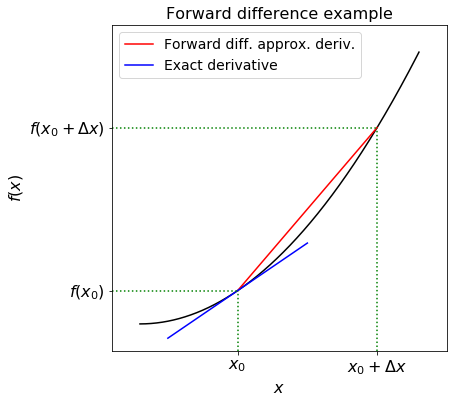

In [21]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.set_xlim(-0.1, 1.1)
ax1.set_ylim(-0.1, 1.1)
ax1.set_title('Forward difference example', fontsize=16)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)$', fontsize=16)
# define our x for plotting purposes
x = np.linspace(0, 1, 1000)

# define our example function and its exact derivative

def f(x):
    return x**2

def df(x):
    return 2 * x

# plot the 'exact' solution
ax1.plot(x, f(x), 'k')
# choose and plot two x locations to take the difference between
x0 = 0.35
dx = 0.5
x1 = x0 + dx
# plot a line representing the discrete derivative
ax1.plot([x0, x1], [f(x0), f(x1)], 'r', label = 'Forward diff. approx. deriv.')
# plot a line representing the exact derivative (given by function f(.)) at x=x0
h = dx / 2
ax1.plot([x0 - h, x0 + h], [f(x0) - h * df(x0), f(x0) + h * df(x0)], 'b', label = 'Exact derivative')
# add some axes labels and lines etc
ax1.set_xticks((x0, x1))
ax1.set_xticklabels(('$x_0$', '$x_0+\Delta x$'), fontsize=16)
ax1.plot([x0, x0], [-0.1, f(x0)], 'g:')
ax1.plot([x1, x1], [-0.1, f(x1)], 'g:')
ax1.set_yticks((f(x0), f(x1)))
ax1.set_yticklabels(('$f(x_0)$', '$f(x_0+\Delta x)$'), fontsize=16)
ax1.plot([-0.1, x0], [f(x0), f(x0)], 'g:')
ax1.plot([-0.1, x1], [f(x1), f(x1)], 'g:')
ax1.legend(loc='best', fontsize=14)


from myst_nb import glue
glue("fdm_example_fig", fig, display=False)

plt.show()

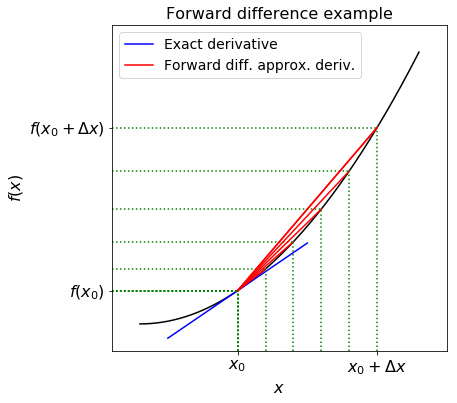

In [22]:
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.set_xlim(-0.1, 1.1)
ax1.set_ylim(-0.1, 1.1)
ax1.set_title('Forward difference example', fontsize=16)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)$', fontsize=16)
# define our x for plotting purposes
x = np.linspace(0, 1, 1000)

# define our example function and its exact derivative

def f(x):
    return x**2

def df(x):
    return 2 * x

# plot the 'exact' solution
ax1.plot(x, f(x), 'k')

# plot a line representing the exact derivative (given by function f(.)) at x=x0
h = dx / 2
ax1.plot([x0 - h, x0 + h], [f(x0) - h * df(x0), f(x0) + h * df(x0)], 'b', label = 'Exact derivative')

for i in [0.1, 0.2, 0.3, 0.4, 0.5]:
    # choose and plot two x locations to take the difference between
    x0 = 0.35
    dx = i
    x1 = x0 + dx
    # plot a line representing the discrete derivative
    ax1.plot([x0, x1], [f(x0), f(x1)], 'r')#, label = 'Forward diff. approx. deriv.')
    # add some axes labels and lines etc
    ax1.set_xticks((x0, x1))
    ax1.set_xticklabels(('$x_0$', '$x_0+\Delta x$'), fontsize=16)
    ax1.plot([x0, x0], [-0.1, f(x0)], 'g:')
    ax1.plot([x1, x1], [-0.1, f(x1)], 'g:')
    ax1.set_yticks((f(x0), f(x1)))
    ax1.set_yticklabels(('$f(x_0)$', '$f(x_0+\Delta x)$'), fontsize=16)
    ax1.plot([-0.1, x0], [f(x0), f(x0)], 'g:')
    ax1.plot([-0.1, x1], [f(x1), f(x1)], 'g:')

ax1.plot([x0, x1], [f(x0), f(x1)], 'r', label = 'Forward diff. approx. deriv.')
ax1.legend(loc='best', fontsize=14)

from myst_nb import glue
glue("fdm_example_fig2", fig, display=False)

plt.show()

````{admonition} Exercise: compute first derivative with FDM
:class: dropdown
Find an approximation to \\(f'(2.36)\\) from the following data:

\\[f(2.36) = 0.85866,\\\\\\
f(2.37) = 0.86289,\\]

using the forward difference scheme.

Solution:

```python
dx = 2.37-2.36
df = (0.86289-0.85866)/dx
print("Derivative with FDM = %.5f. " % df)
```

The answer should be 0.423.

````

## Estimating accuracy

As previously discussed, there are many different methods that are possible to use for numerical differentiation. Ultimately, all methods will move closer to the derivative of the function at the point \\(x_0\\) as the \\(\Delta x\\) used becomes smaller and smaller. What differentiates a good method from a bad  method is how accurate the estimate for the derivative is, given that all methods have the same \\(\Delta x\\) in their equation. Thus what makes a method good/bad is the accuracy of the method. 

We can use a {ref}`Taylor series <taylor_series>` expansion, or Taylor series analysis, to estimate the accuracy of the method. Recall that Taylor series in one dimension tells us that we can approximate the value of the function at a location in terms of its value, and value of its derivative, at a nearby point:

$$
\begin{align*}
f(x_0+h) &= f(x_0) + hf'(x_0) + \frac{h^2}{2!}f''(x_0) + \frac{h^3}{3!}f'''(x_0) + \ldots\\[5pt]
&= f(x_0)+hf'(x_0) + \frac{h^2}{2!}f''(x_0) + \mathcal{O}(h^3),
\end{align*}
$$
where \\(\mathcal{O}(h^3)\\) represents the collection of terms that are third-order in \\(h\\) or higher. We call this the Taylor series expansion about (or around) the point \\(x_0\\) (since all the functions in the expansion on the RHS are evaluated at this point). An equivalent way of writing this expansion would be (just define \\(x\\) to be \\(x_0+h\\))

\\[f(x) = f(x_0) + (x - x_0) f'(x_0) + \frac{(x - x_0)^2}{2!} f''(x_0) + \frac{(x - x_0)^3}{3!} f'''(x_0) + \mathcal{O}((x - x_0)^4).\\]


The error increases if \\(\Delta x\\) increase, while the error decreases if the \\(\Delta x\\) decreases. 

1st order accuracy means that the error and \\(\Delta x\\) are in a linear relationship. As we make the spacing smaller we expect the error in our derivative to fall linearly, meaning that if we made the spacing 2 times smaller, the error becomes 2 times smaller. 


### Taylor series example

The figure below represents an exponential function (in blue) and the sum of the first (\\(n+1\\)) terms of its Taylor series expansion around the point 0 (in red).

<p style="text-align:center;"><img src="https://upload.wikimedia.org/wikipedia/commons/6/62/Exp_series.gif" width="300px"></p>

Source: [Wikipedia](https://upload.wikimedia.org/wikipedia/commons/6/62/Exp_series.gif)


As can be seen, more terms in the Taylor series means that the function resulting from the Taylor series better match with the actual function. It also means that the Taylor series better match with the function at greater distance away form point 0. Of course, if we are very close to the point 0, then the function obtained from Taylor series with more terms has very little difference to the function obtained from Taylor series with fewer terms; however, if we move further away from the point 0, then the function obtained from Taylor series with more terms remains accurate, while the numerical derivative from the Taylor series with less terms deviates significantly.  

(nm_fdm_accuracy)=
### FDM accuracy

Forward difference method is 1st order accurate. Let's prove it with Taylor series.

```{margin} Note
We state that forward difference method is a numerical differentiation method, that has a certain order of accuracy when finding the numerical derivative at the point \\(x_0\\). The Taylor series is exact, meaning that the left hand side of the Taylor series is exactly equal to the right hand side of the Taylor series. It should also be noted that moving terms form left hand side of the Taylor series to the right hand side of the Taylor series does not affec the equality of the Taylor series. 
```

To find the accuracy of a numerical differentiation method, we need a comparison between the numerical differentiation method and something exact; thus, we will compare the forward difference method to the Taylor series (exact solution), to understand how much does the estimate differ from the exact.

Forward difference method:
\\[ f'(x_0)\approx \frac{f(x_0+\Delta x)-f(x_0)}{\Delta x},\quad \Delta x>0. \\]

Taylor series:
\\[ f(x_0+h) = f(x_0) + hf'(x_0) + \frac{h^2}{2!}f''(x_0) + \frac{h^3}{3!}f'''(x_0) + \ldots.\\]

Since both \\(h\\) and \\(\Delta x\\) refer to very small numbers, by assuming that \\(h > 0\\) we could say that \\(h \approx \Delta x\\), and thus rewrite as:

\\[ f'(x_0)\approx \frac{f(x_0+h)-f(x_0)}{h},\;\;\;\; h>0,\\\\\\
f(x_0+h) = f(x_0) + hf'(x_0) + \frac{h^2}{2!}f''(x_0) + \frac{h^3}{3!}f'''(x_0) + \ldots.\\]

To make comparisons, we take the common parts out, and find the parts that are different:
\\[ f'(x_0)\approx \frac{f(x_0+h)-f(x_0)}{h},\quad h>0,\\\\\\
\frac {f(x_0+h) - f(x_0)}{h}= f'(x_0) + \frac{h^1}{2!}f''(x_0) + \frac{h^2}{3!}f'''(x_0) + \ldots.\\]

Making the same thing appear on the LFH of both the FDM and the Taylor Series:
\\[\text{FDM: } f'(x_0)\approx \frac{f(x_0+h)-f(x_0)}{h},\quad h>0,\\\\\\
\text{Taylor series: }f'(x_0) =  \frac {f(x_0+h) - f(x_0)}{h}   - \frac{h^1}{2!}f''(x_0) - \frac{h^2}{3!}f'''(x_0) + \ldots.\\]

We see that there are differences between the FDM and the Taylor series for how the derivative of the function at the point \\(x_0\\) is defined. The Taylor series have several extra terms \\(- \frac{h^1}{2!}f''(x_0) - \frac{h^2}{3!}f'''(x_0) + \ldots\\) compared to the FDM. The extra terms of the Taylor series, start from the term that includes 2nd derivative of the function \\(- \frac{h^1}{2!}f''(x_0)\\) and continue onwards to terms that include higher derivatives, like the 3rd, 4th. These extra terms are the difference between the Taylor series and the FDM solution. 

The Taylor series and FDM are similar up to, and not including the 2nd derivative of the function. Thus, because the similarity between the Taylor series and the FDM does not include the 2nd derivative, or any other higher derivative, we say that the FDM is only **1st order accurate**.

(nm_central_difference)=
## Central difference method (CDM)
```{index} Central difference
```
In an attempt to derive a more accurate method we use two Taylor series expansions - one in the positive and one in negative \\(x\\) direction from \\(x_0\\). Since we hope to achieve better than first-order accuracy, we include an extra term in the series:

\\[
f(x_0+ \Delta x) = f(x_0)+\Delta x f'(x_0)+\frac{\Delta x^2}{2}f''(x_0) + \mathcal{O}(\Delta x^3),\\\\\\
f(x_0- \Delta x) = f(x_0)- \Delta x f'(x_0)+\frac{(-\Delta x)^2}{2}f''(x_0) + \mathcal{O}((-\Delta x)^3).\\]

```{margin} Note
Note that we don't worry about signs when using the \\(\mathcal{O}\\) notation.
```
Using the fact that \\((-\Delta x)^2=\Delta x^2\\) and the absolute value signs from the definition of \\(\mathcal{O}\\)):

\\[ 
f(x_0+\Delta x) = f(x_0)+\Delta xf'(x_0)+\frac{\Delta x^2}{2}f''(x_0) + \mathcal{O}(\Delta x^3),\\\\\\
f(x_0-\Delta x) = f(x_0)-\Delta xf'(x_0)+\frac{\Delta x^2}{2}f''(x_0) + \mathcal{O}(\Delta x^3).\\]

Remember that we are looking for an expression for \\(f'(x_0)\\). Noticing the sign change between the derivative terms in the two equations, we subtract the second equation from the first to give:

\\[ f(x_0+\Delta x)-f(x_0-\Delta x)=2\Delta xf'(x_0) + \mathcal{O}(\Delta x^3).\\]
Finally, we can rearrange to get an expression for \\(f'(x_0)\\):

\\[ f'(x_0)=\frac{f(x_0+\Delta x)-f(x_0-\Delta x)}{2\Delta x} + O(\Delta x^2),\\]
which, contrary to the 1st order FDM, is an approximation to the derivative that is **2nd order accurate**.

By considering an interval symmetric about \\(x_0\\), we have created a second-order approximation for the derivative of \\(f\\). This symmetry gives the scheme its name - the [central difference method](https://en.wikipedia.org/wiki/Central_differencing_scheme).

The figure below illustrates this scheme:

```{glue:} cdm_example_fig
```

The derivative is approximated by the slope of the red line, while the true derivative is the slope of the blue line. Even without the analysis above it's hopefully clear visually why this should in general give a lower error than the forward difference. If we halve \\(h\\), the error should drop by a factor of 4, rather than 2 in case of 1st order scheme.

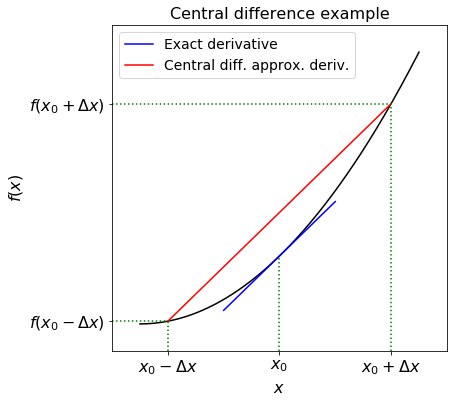

In [28]:
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.set_xlim(-0.1, 1.1)
ax1.set_ylim(-0.1, 1.1)
ax1.set_title('Central difference example', fontsize=16)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)$', fontsize=16)
# define our x for plotting purposes
x = np.linspace(0, 1, 1000)

# define our example function and its exact derivative

def f(x):
    return x**2

def df(x):
    return 2 * x

# plot the exact solution
ax1.plot(x, f(x), 'k')
# choose and plot two x locations to take the difference between
dx = 0.4
x0 = 0.5
xl = x0 - dx
xr = x0 + dx
# plot a line representing the exact derivative at x=x0
h = dx / 2
ax1.plot([x0 - h, x0 + h], [f(x0) - h * df(x0), f(x0) + h * df(x0)], 'b', label = 'Exact derivative')
# plot a line representing the discrete derivative
ax1.plot([xl, xr], [f(xl), f(xr)], 'r', label = 'Central diff. approx. deriv.')
# add some axes labels and lines etc
ax1.set_xticks((xl, x0, xr))
ax1.set_xticklabels(('$x_0-\Delta x$', '$x_0$', '$x_0+\Delta x$'), fontsize=16)
ax1.plot([xl, xl], [-0.1, f(xl)], 'g:')
ax1.plot([xr, xr], [-0.1, f(xr)], 'g:')
ax1.plot([x0, x0], [-0.1, f(x0)], 'g:')
ax1.set_yticks((f(xl), f(xr)))
ax1.set_yticklabels(('$f(x_0-\Delta x)$', '$f(x_0+\Delta x)$'), fontsize=16)
ax1.plot([-0.1, xl], [f(xl), f(xl)], 'g:')
ax1.plot([-0.1, xr], [f(xr), f(xr)], 'g:')
ax1.legend(loc='best', fontsize=14)

from myst_nb import glue
glue("cdm_example_fig", fig, display=False)

plt.show()

````{admonition} Exercise: compute first derivative with CDM
:class: dropdown
Find an approximation to \\(f'(0.2)\\) from the following data:

\\[f(0.1) = 0.078348,\\\\\\
f(0.2) = 0.138910,\\\\\\
f(0.3) = 0.192916,\\]

using the central difference scheme.

Solution:

```python
dx = 0.1
df = (0.192916-0.078348)/(2*dx)
print("Derivative with CDM = %.5f. " % df)
```

The answer should be 0.57284.

````

(nm_second_derivative)=
### Second derivative
```{index} Numerical 2nd derivative
```

Numerical differentiation may be extended to the second derivative by noting that the second derivative is the derivative of the first derivative. That is, if we define a new function \\(g\\) where:

\\[ g(x) = f'(x), \\]

then

\\[ f''(x) = g'(x), \\]

a consequence of this (obvious) observation is that we can just apply our differencing formula twice in order to achieve a second derivative, and so on for even higher derivatives.

Recall that {ref}`central difference method <nm_central_difference>` is 2nd order accurate, and superior to the {ref}`forward difference method <nm_forward_difference>`. Therefore, we will extend the central difference method to find second derivative.

```{margin} Note
We make this choice since we have a vision to ultimately end up with an approximation that utilises a three-point stencil. Three-point stencil means that the equation at the end will only use three points, namely
\\[f(x_0+\Delta x),\ f(x_0) \text{ and } f(x_0-\Delta x)\\].
If we have used \\(\Delta x\\) instead, the equation would need more point stencil.
```


In order to calculate \\(f''(x_0)\\) using a central difference method, we first calculate \\(f'(x)\\) for each of two half intervals, one to the left of \\(x_0\\) and one to the right:

\\[
f'\left(x_0+\frac{\Delta x}{2}\right) \approx \frac{f(x_0+\Delta x)-f(x_0)}{\Delta x},\\\\\\
f'\left(x_0-\frac{\Delta x}{2}\right) \approx \frac{f(x_0)-f(x_0-\Delta x)}{\Delta x}.
\\]

We recognise the formula on the RHS above as first-order forward and backward differences, if we were to consider the derivatives on the LHS to be evaluated at \\(x_0\\). 

By considering the LHS at \\(x_0\pm \Delta x/2\\) they are in actual fact second-order *central* differences where the denominator of the RHS is \\(2\times (\Delta x/2)\\).

We can now calculate the second derivative making use of these two values within another central difference. But we must note again that these two values are telling us \\(f'(x)\\) at the points \\(x_0\pm{\Delta x}/{2}\\), which are only \\(\Delta x\\) rather than \\(2\Delta x\\) apart. 

In the central difference formula, the denominator is the difference of the inputs into the function at the numerator. The inputs here are \\(x_0+\frac{\Delta x}{2}\\) and \\(x_0-\frac{\Delta x}{2}\\), so the denominator will be \\((x_0+\frac{\Delta x}{2}) - (x_0-\frac{\Delta x}{2})\\), which yields \\(\Delta x\\).

We must remember this in the denominator of the central difference formula to yield

\\[
    f''(x_0)\approx\frac{f'(x_0+\frac{\Delta x}{2})-f'(x_0-\frac{\Delta x}{2})}{\Delta x},\\\\\\
    f''(x_0)\approx\frac{\frac{f(x_0+\Delta x)-f(x_0)}{\Delta x}-\frac{f(x_0)-f(x_0-h)}{\Delta x}}{\Delta x},\\\\\\
    f''(x_0)\approx\frac{f(x_0+\Delta x)-2f(x_0)+f(x_0-\Delta x)}{\Delta x^2}.
\\]

````{admonition} Exercise: compute second derivative
:class: dropdown
Find an approximation to \\(f''(1)\\) from the following data:

\\[f(0.84) = 0.431711,\\\\\\
f(0.92) = 0.398519,\\\\\\
f(1.00) = 0.367879,\\\\\\
f(1.08) = 0.339596,\\\\\\
f(1.16) = 0.313486.\\]

Solution:

```python
dx = 0.08
ddf = (0.339596 - 2*0.367879 + 0.398519)/(dx*dx)
print("2nd Derivative with CDM = %.5f. " % ddf)
```

The answer should be 0.36828.

We were given more data than we actually used. An alternative approach would be to use *non-centred differencing*, e.g. the following is also a valid approximation to the second derivative

\\[f''(x_0)\approx\frac{f(x_0+2\Delta x)-2f(x_0+\Delta x)+f(x_0)}{\Delta x^2}.\\]

This can come in handy if we need to approximate the value of derivatives at or near to a boundary where we don't have data beyond that boundary.

If we wanted to use all of this data, an alternative would be to fit a polynomial, and then differentiate this analytical expression exactly to approximate the derivative at any point between 0.84 and 1.16 (recalling that extrapolation is dangerous).
````
(nm_solving_diff_eq)=
## Solving differential equations

One of the most important applications of numerical mathematics in the sciences is the numerical solution of ordinary differential equations (ODEs). While the ODEs you will encounter during your mathematics modules are mostly solvable through analytical solutions, real world ODE are often in the form where it has been proven that no analytical solutions exists. However, many of these ODEs govern important physical processes, and thus, numerical solutions were found for these ODEs. 

To recap through an example, suppose we have the general first-order ODE:

```{margin} Note
For \\(u=u(t)\\), \\(\frac{du}{dt}=u'=\dot{u}\\).
```
\\[
u'(t)=f(u(t),t) \\
u(t_0)=u_0.\\]

That is, the derivative of \\(u\\) with respect to \\(t\\) is some known function of \\(u\\) and \\(t\\), and we also know the initial condition of \\(u\\) at some initial time \\(t_0\\).

If we manage to solve this equation analytically, the solution will be a function \\(u(t)\\) which is defined for every \\(t>t_0\\). Our objective is to find an approximate solution to the ODE at a finite set of points. In this case, we will attempt to find approximate solutions at \\(t=t_0,\\), \\(t_0+\Delta t\\), \\(t_0+2\Delta t\\), \\(t_0+3\Delta t\\), \\(\ldots\\).

It is frequently useful to think of the independent variable, \\(t\\), as representing time. A numerical method steps forward in time units of \\(\Delta t\\), attempting to calculate \\(u(t+\Delta t)\\) in using the previously calculated value \\(u(t)\\).

More on timestepping an ODE can be found {ref}`here <timestepping_ode>`.

### Euler method

Euler method is one of the simplest schemes to solve ODEs. You can find the notebook expanding on this method {ref}`here <nm_euler_method>`.

### Heun's method

Heun's method is a modified/improved version of the Euler method. You can find the notebook expanding on this method {ref}`here <nm_heun_method>`.

### Runge-Kutta method

Runge-Kutta method is a 4th order interative method of approximating ODEs. You can find the notebook expanding on this method {ref}`here <runge_kutta_method>`.

### Successive over-relaxation method

Successive over-relaxation is a method of solving partial differential equations (PDEs). You can find the notebook expanding on this method {ref}`here <successive_over_relaxation>`.

### Forward Time Centred Space method

Forward Time Centred Space scheme is used for parabolic PDEs. You can find the notebook expanding on this method {ref}`here <ftcs_scheme>`.

## Exercises

### A function to perform numerical differentiation

As covered above, the expression

\\[\frac{f(x+\Delta x) - f(x-\Delta x)}{2\Delta x},\\]

can be used to find an approximate derivative of the function \\(f(x)\\) provided that \\(\Delta x\\) is appropriately small. 

Let's write a function `diff(f, x, dx = 1.0e-6)` that returns the approximation of the derivative of a mathematical function represented by a Python function `f(x)`.

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def diff(f, x, dx=1e-6):
    numerator = f(x + dx) - f(x - dx)
    derivative = numerator / ( 2.0 * dx )
    return derivative

Let's apply the above formula to differentiate \\(f(x) = e^x\\) at \\(x = 0\\), \\(f(x) = e^{−2x}\\) at \\(x = 0\\), \\(f(x) = \cos(x)\\) at \\(x = 2\pi\\), and \\(f(x) = \ln(x)\\) at \\(x = 1\\).

In each case, using \\(\Delta x = 0.01\\), let's write out the error, i.e. the difference between the exact derivative and the result of the formula above.

In [33]:
dx = 0.01
x = 0
f = np.exp
derivative = diff(f, x, dx)
print("The approximate derivative of exp(x) at x = 0 is: %f. The error is %f."
      % (derivative, abs(derivative - 1)))
x = 0

def g(x):
    return np.exp(-2*x)

derivative = diff(g, x, dx)
print('The approximate derivative of exp(-2*x) at x = 0 is: {0:.5f}.  The error is {1:.5f}.'
        .format(derivative, abs(derivative - (-2.0))))

x = 2*np.pi
f = np.cos
derivative = diff(f, x, dx)
print('The approximate derivative of cos(x) at x = 2*pi is: {0:.5f}.  The error is {1:.5f}.'
        .format(derivative, abs(derivative - 0)))

x = 1
f = np.log
derivative = diff(f, x, dx)
print('The approximate derivative of ln(x) at x = 0 is: {0:.5f}.  The error is {1:.5f}.'
        .format(derivative, abs(derivative - 1)))

The approximate derivative of exp(x) at x = 0 is: 1.000017. The error is 0.000017.
The approximate derivative of exp(-2*x) at x = 0 is: -2.00013.  The error is 0.00013.
The approximate derivative of cos(x) at x = 2*pi is: 0.00000.  The error is 0.00000.
The approximate derivative of ln(x) at x = 0 is: 1.00003.  The error is 0.00003.


### Derivative of \\(sin(x)\\)

We will compute 

\\[\frac{d(\sin x)}{dx}\qquad\textrm{at}\qquad x = 0.8\\]

using FDM and CDM. We will evaluate these derivatives for decreasing values of \\(h\\) (starting with \\(h=1.0\\) and halving) and compare the values against the exact solution.

At first let's define `forward_diff` and `central_diff` functions:

In [34]:
def forward_diff(f, x, dx):
    fx = f(x)
    fxph = f(x + dx)
    return (fxph - fx) / dx


def central_diff(f, x, dx):
    fxph = f(x + dx)
    fxnh = f(x - dx)
    return (fxph - fxnh) / (2 * dx)

We know that the exact solution is \\(\frac{d \sin(x){dx}=\cos{x}\\), we can evaluate that and store to compare later with the numerical solution:

In [37]:
exact = np.cos(0.8)
print("Exact derivative at sin(0.8) = %.5f." % exact)

Exact derivative at sin(0.8) = 0.69671.


Now, we can compute solution with two schemes and compare with the exact solution:

In [39]:
# headers for the following errors outputs
print('%20s%40s' % ('Forward differencing', 'Central differencing'))

# We're going to store all the values for plotting,
# initialise variable for these
fd_errors = []
cd_errors = []
dx_all = []
dx = 1.0  # An initial mesh spacing

for i in range(10):
    fd = forward_diff(np.sin, 0.8, dx)
    cd = central_diff(np.sin, 0.8, dx)
    print('%10g (error=%10.2g)         %10g (error=%10.2g)' %
          (fd, abs(fd - exact), cd, abs(cd - exact)))
    # Store the h and the errors
    dx_all.append(dx)
    fd_errors.append(abs(fd - exact))
    cd_errors.append(abs(cd - exact))
    dx = dx / 2  # Halve h for the next iteration

Forward differencing                    Central differencing
  0.256492 (error=      0.44)           0.586258 (error=      0.11)
  0.492404 (error=       0.2)           0.668038 (error=     0.029)
  0.600269 (error=     0.096)           0.689472 (error=    0.0072)
  0.650117 (error=     0.047)           0.694894 (error=    0.0018)
  0.673843 (error=     0.023)           0.696253 (error=   0.00045)
  0.685386 (error=     0.011)           0.696593 (error=   0.00011)
  0.691074 (error=    0.0056)           0.696678 (error=   2.8e-05)
  0.693897 (error=    0.0028)             0.6967 (error=   7.1e-06)
  0.695304 (error=    0.0014)           0.696705 (error=   1.8e-06)
  0.696006 (error=    0.0007)           0.696706 (error=   4.4e-07)


Let's plot the errors in a log-log plot so that we can see the relationship between the error and the increment:

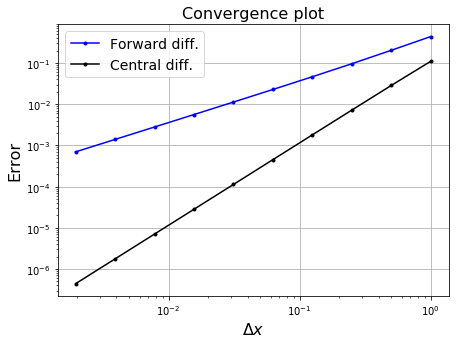

In [40]:
# Set up figure
fig = plt.figure(figsize=(7, 5))
ax1 = plt.subplot(111)

ax1.loglog(dx_all, fd_errors, 'b.-', label='Forward diff.')
ax1.loglog(dx_all, cd_errors, 'k.-', label='Central diff.')
ax1.set_xlabel('$\Delta x$', fontsize=16)
ax1.set_ylabel('Error', fontsize=16)
ax1.set_title('Convergence plot', fontsize=16)
ax1.grid(True)
ax1.legend(loc='best', fontsize=14)

plt.show()

The errors fall linearly in \\(\Delta x\\) on a log-log plot, therefore they have a polynomial relationship. The slopes of the lines indicate the order of the relationship - slope 1 for forward difference and slope 2 for central difference.